In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from KmeansGroup3 import KMeans, elbow_plot

In [15]:
df = pd.read_excel('educational_buildings.xlsx')
df.head()

,Name,Address,Latitude,Longitude,Type
0,CJCC (Cambodia-Japan Cooperation Center),"Rupp-CJCC, មហាវិថី សហពន្ធ័រុស្ស៊ី (១១០), ភ្នំពេញ",11.568929,104.893694,"school, point_of_interest, establishment"
1,Angkor Computer Center,"#95E0, Saint 164, Phnom Penh",11.563684,104.912819,"school, point_of_interest, establishment"
2,SAS Santhormuk - Stanford American School,"#197, St.146, Teuk laok 2, Phnom Penh",11.564989,104.899767,"school, primary_school, secondary_school, poin..."
3,"Sovannaphumi School, Tep Phan Campus","6A Oknha Tep Phan St. (182), Phnom Penh",11.563052,104.900276,"school, point_of_interest, establishment"
4,"Aii Language Center (Aii), Mao Tse Tong (QLH B...","217 ABCD Mao Tse Tong Blvd, ភ្នំពេញ",11.546374,104.907986,"school, point_of_interest, establishment"


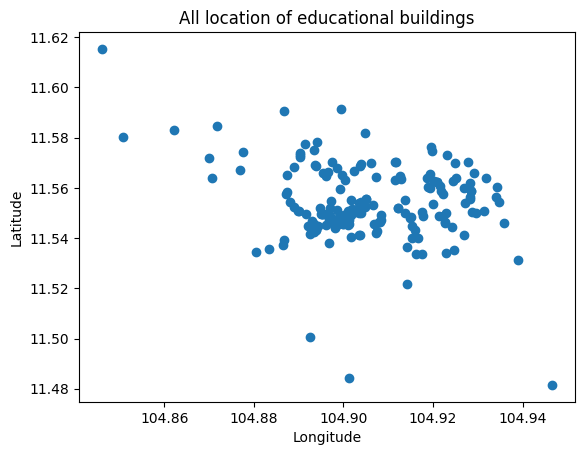

In [16]:
# plot the all location on the map
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('All location of educational buildings')
plt.show()

In [17]:
# plot the all location on the map
import folium

m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
for i in range(len(df)):
    folium.Marker([df['Latitude'][i], df['Longitude'][i]], popup=df['Name'][i]).add_to(m)
m.save('educational_buildings.html')

<iframe src="https://plseng.github.io/EduCafe_Locator/educational_buildings" width="800" height="600"></iframe>

In [18]:
# Function to identify outliers using IQR method
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for Latitude and Longitude
latitude_outliers = identify_outliers(df, 'Latitude')
longitude_outliers = identify_outliers(df, 'Longitude')

# Combine the outliers into one dataframe
outliers = pd.concat([latitude_outliers, longitude_outliers]).drop_duplicates()

outliers

,Name,Address,Latitude,Longitude,Type
46,Cambodian University for Specialties,Phnom Penh,11.591249,104.899513,"university, point_of_interest, establishment"
87,បណ្ណាគារ​សេរីភាព (ក្រុង តាខ្មៅ),"FWJW+JM8, ផ្លូវលេខ ១០៧, Krong Ta Khmau",11.481532,104.946697,"book_store, point_of_interest, store, establis..."
96,Choeung Ek Genocidal Center,"ផ្លូវជើងឯក, Phnom Penh",11.484240,104.901276,"tourist_attraction, museum, cemetery, point_of..."
160,Home of English Cambodia Tuol Kork (Sen Sok),"#385A St.1928, Phnom Penh",11.590710,104.886732,"school, primary_school, point_of_interest, est..."
173,Tuol Ampil High School,"GV2V+62C, ផ្លូវជើងឯក, Phnom Penh",11.500573,104.892523,"secondary_school, school, point_of_interest, e..."
174,IU International School,"#1108, Trail, Sangkat Khmuohn",11.615329,104.845964,"secondary_school, school, point_of_interest, e..."
27,Kurmul International School,"Street 1978, Phum Kork Khleang, Sangkat Phnom ...",11.580072,104.850738,"school, point_of_interest, establishment"
67,EurekaMag.com,"មហាវិថី មិត្តភាព ភ្នំពេញ ហាណូយ (១០១៩), Phnom Penh",11.582960,104.862114,"library, book_store, point_of_interest, store,..."


In [19]:
# plot outliers on the map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
for i in range(len(df)):
    folium.Marker([df['Latitude'][i], df['Longitude'][i]], popup=df['Name'][i]).add_to(m)
for i in range(len(outliers)):
    folium.Marker([outliers['Latitude'].iloc[i], outliers['Longitude'].iloc[i]], popup=outliers['Name'].iloc[i], icon=folium.Icon(color='red')).add_to(m)
m.save('educational_buildings_outliers.html')

<iframe src="https://plseng.github.io/EduCafe_Locator/educational_buildings_outliers.html" width="800" height="600"></iframe>

In [20]:
# drop outliers
df = df.drop(outliers.index)

df.shape

(175, 5)

In [21]:
X = df[['Latitude', 'Longitude']].values

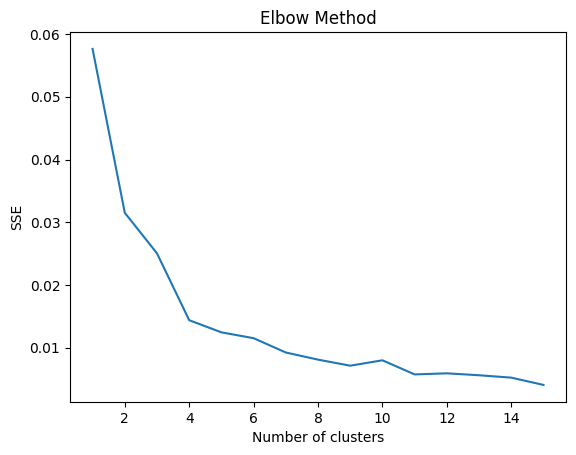

In [22]:
elbow_plot(X, k_max=15)

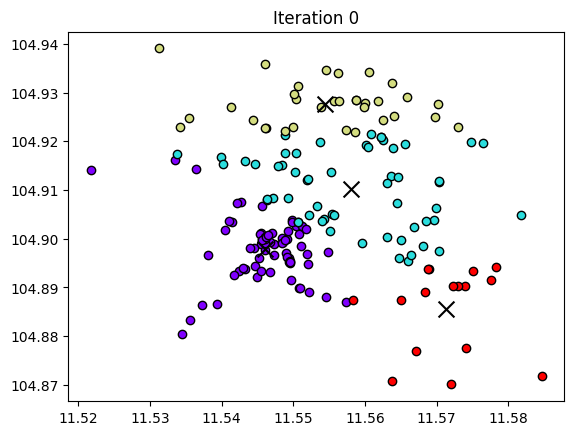

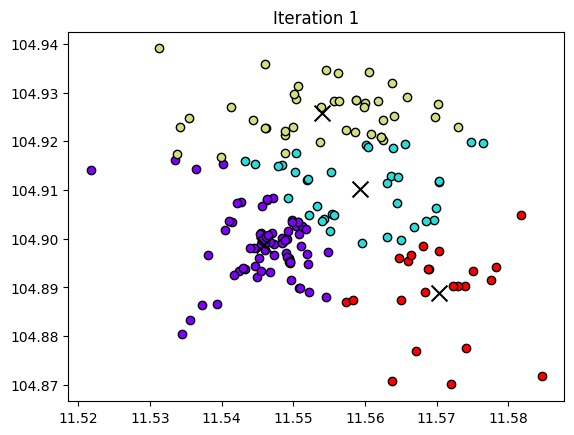

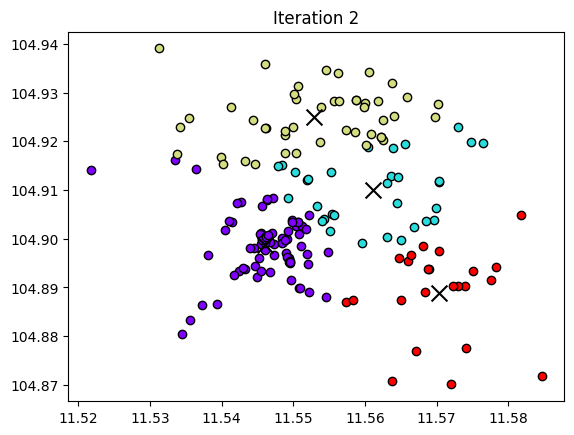

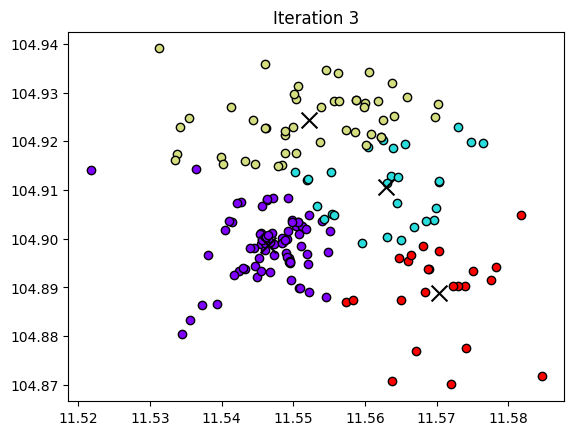

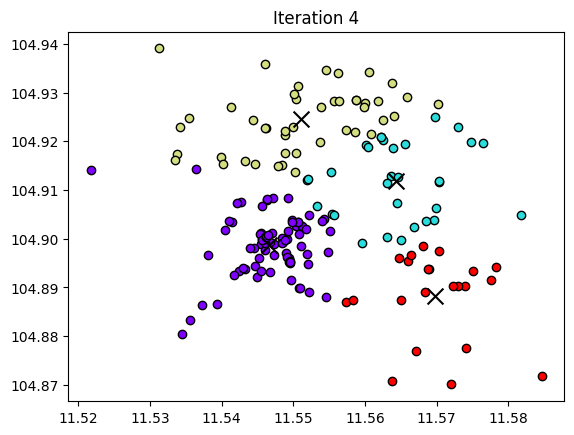

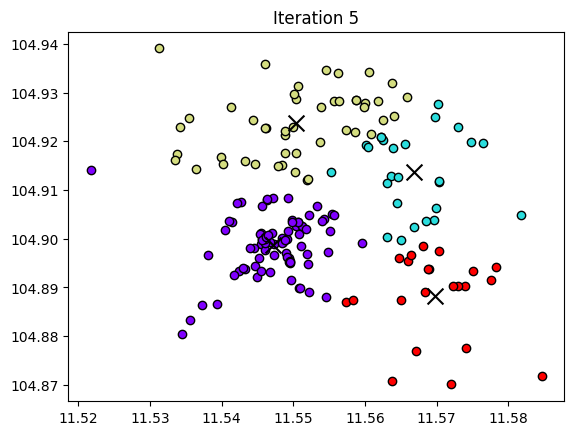

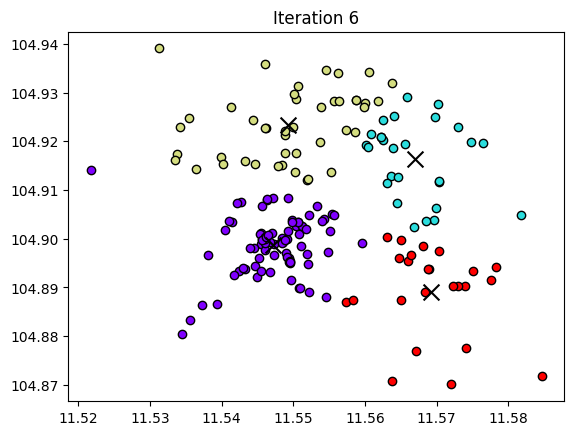

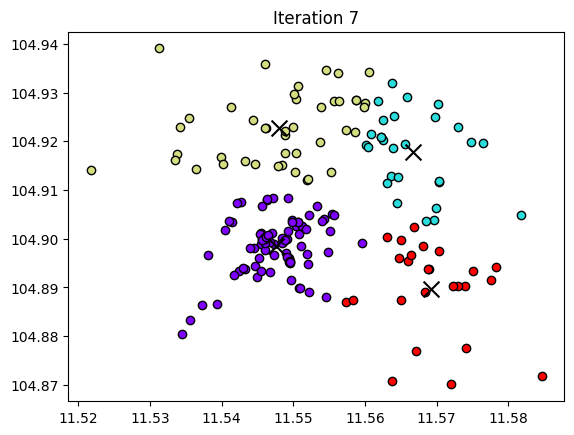

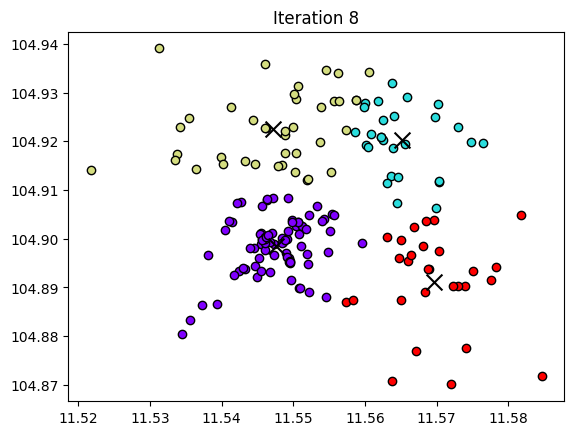

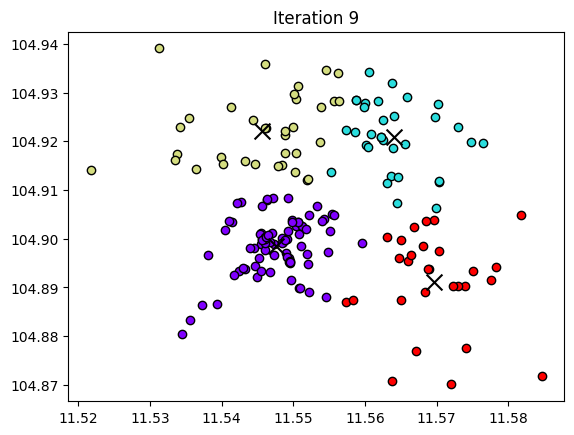

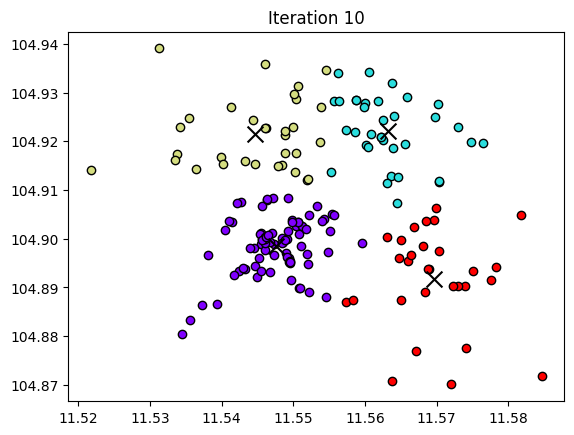

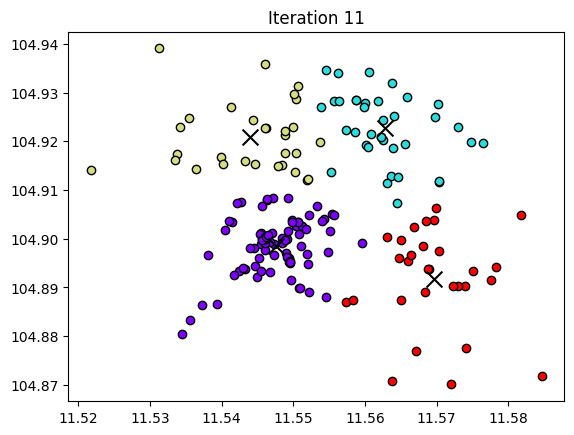

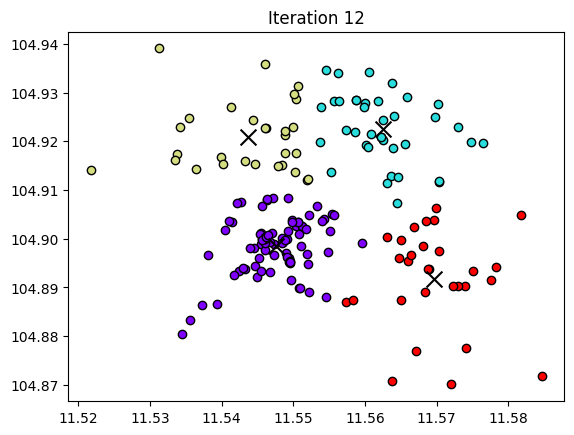

In [23]:
model = KMeans(K=4)
model.fit(X, plot_steps=True)

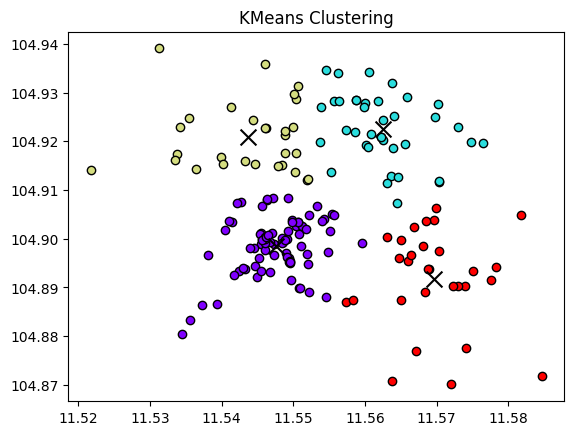

In [24]:
model.plot()

In [25]:
# add centroids to the map
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)
for i in range(len(df)):
    if i in df.index:
        folium.Marker([df['Latitude'][i], df['Longitude'][i]], popup=df['Name'][i]).add_to(m)
for i in range(model.K):
    folium.Marker([model.centroids[i][0], model.centroids[i][1]], popup=f'Centroid {i}', icon=folium.Icon(color='green')).add_to(m)
m.save('educational_buildings_clusters.html')

<iframe src="https://plseng.github.io/EduCafe_Locator/educational_buildings_clusters" width="800" height="600"></iframe>

In [26]:
model.centroids

[array([ 11.54755361, 104.89859743]),
 array([ 11.56252939, 104.92257612]),
 array([ 11.54368717, 104.92084352]),
 array([ 11.56961967, 104.89172859])]

In [27]:
model.clusters

[[4,
  21,
  22,
  25,
  29,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  43,
  52,
  53,
  54,
  65,
  66,
  77,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  93,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  156,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  169,
  170,
  171,
  172,
  173,
  174],
 [1,
  14,
  15,
  19,
  20,
  26,
  30,
  47,
  49,
  59,
  64,
  70,
  71,
  72,
  73,
  74,
  75,
  78,
  82,
  83,
  84,
  94,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  150,
  152,
  166,
  167,
  168],
 [8,
  9,
  10,
  11,
  16,
  17,
  23,
  24,
  28,
  42,
  50,
  51,
  61,
  62,
  63,
  68,
  69,
  76,
  92,
  95,
  96,
  97,
  98,
  99,
  149,
  151,
  154,
  157,
  165],
 [0,
  2,
  3,
  5,
  6,
  7,
  12,
  13,
  18,
  27,